In [1]:
println("hello, worlds!")

hello, worlds!


In [2]:
f(z, c) = z.*z .+ c

function julia(z, c; maxiter=200)
    for n = 1:maxiter
        if abs2(z) > 4.0
            return n-1
        end
        z = f(z, c)
    end
    return maxiter
end

julia (generic function with 1 method)

In [3]:
Pkg.add("PyCall")
using PyCall

@pyimport numpy as np
z = np.linspace(-1., 1., 100)
sum(z)

INFO: Nothing to be done


7.327471962526033e-15

In [4]:
m = [julia(z[i], 0.5) for i=1:2]

2-element Array{Int64,1}:
 2
 2

In [5]:
m = [julia(z[i], 0.5) for i=1:100]

100-element Array{Int64,1}:
 2
 2
 2
 2
 2
 2
 2
 2
 3
 3
 3
 3
 3
 ⋮
 3
 3
 3
 3
 2
 2
 2
 2
 2
 2
 2
 2

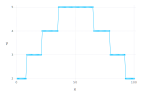

In [6]:
using Gadfly
plot(x=1:100, y=m, Geom.point, Geom.line)

In [7]:
@time m = [julia(complex(r, i), complex(-0.06, 0.67))
           for i = 1:-0.001:-1,
               r = -1.5:.001:1.5];

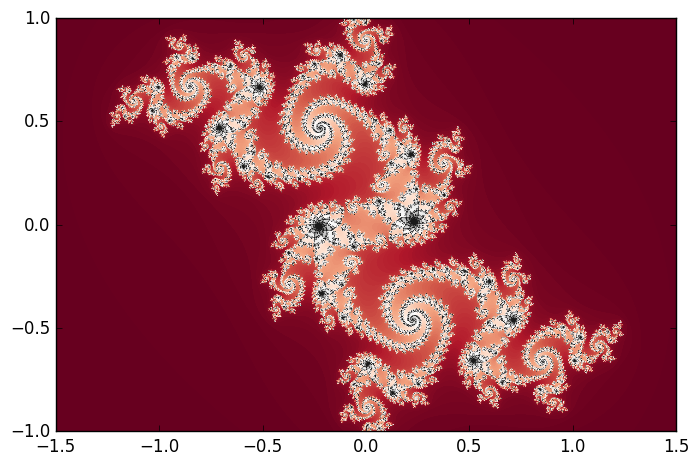

PyObject <matplotlib.image.AxesImage object at 0x7f77fe8384e0>

0.612937 seconds (2 allocations: 45.815 MB)


In [8]:
using PyPlot
imshow(m, cmap="RdGy", extent=[-1.5, 1.5, -1, 1])